## 1). Exploración de Datos para Clustering


In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Load the dataset
file_path = '/mnt/data/World Happiness Report 2022.csv'
happiness_data = pd.read_csv("World Happiness Report 2022.csv")
# Display the first few rows of the dataframe
happiness_data.head()


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


### Descripción del Conjunto de Datos
Descripción general del conjunto de datos y realizamos una verificación básica de la integridad de los datos.


In [3]:
valores_faltantes = happiness_data.isnull().sum()
valores_faltantes


RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

In [4]:
# Resumen de las estadisticas del dataset
res_estadisticas = happiness_data.describe()
res_estadisticas

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


### Matriz de Correlación y Heatmap

In [5]:
happiness_numeric = happiness_data.apply(pd.to_numeric, errors='coerce')
happiness_numeric = happiness_numeric.dropna(axis=1, how='all')
correlacion_matriz = happiness_numeric.corr()
correlacion_matriz

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
RANK,1.000000,-0.980856,-0.978345,-0.982031,-0.444633,-0.792137,-0.773773,-0.750945,-0.623040,-0.032831,-0.403199
Happiness score,-0.980856,1.000000,0.999333,0.999383,0.498990,0.763677,0.777889,0.740260,0.624822,0.063785,0.416216
Whisker-high,-0.978345,0.999333,1.000000,0.997434,0.514099,0.752104,0.773375,0.727611,0.622934,0.065728,0.413718
Whisker-low,-0.982031,0.999383,0.997434,1.000000,0.483762,0.773844,0.781302,0.751530,0.625926,0.061820,0.418162
Dystopia (1.83) + residual,-0.444633,0.498990,0.514099,0.483762,1.000000,-0.073423,0.083606,-0.006886,0.117695,0.066915,-0.051075
Explained by: GDP per capita,-0.792137,0.763677,0.752104,0.773844,-0.073423,1.000000,0.722421,0.815386,0.458591,-0.164472,0.377589
Explained by: Social support,-0.773773,0.777889,0.773375,0.781302,0.083606,0.722421,1.000000,0.666760,0.480466,-0.002339,0.223352
Explained by: Healthy life expectancy,-0.750945,0.740260,0.727611,0.751530,-0.006886,0.815386,0.666760,1.000000,0.433166,-0.098133,0.362626
Explained by: Freedom to make life choices,-0.623040,0.624822,0.622934,0.625926,0.117695,0.458591,0.480466,0.433166,1.000000,0.176800,0.402474
Explained by: Generosity,-0.032831,0.063785,0.065728,0.061820,0.066915,-0.164472,-0.002339,-0.098133,0.176800,1.000000,0.096107


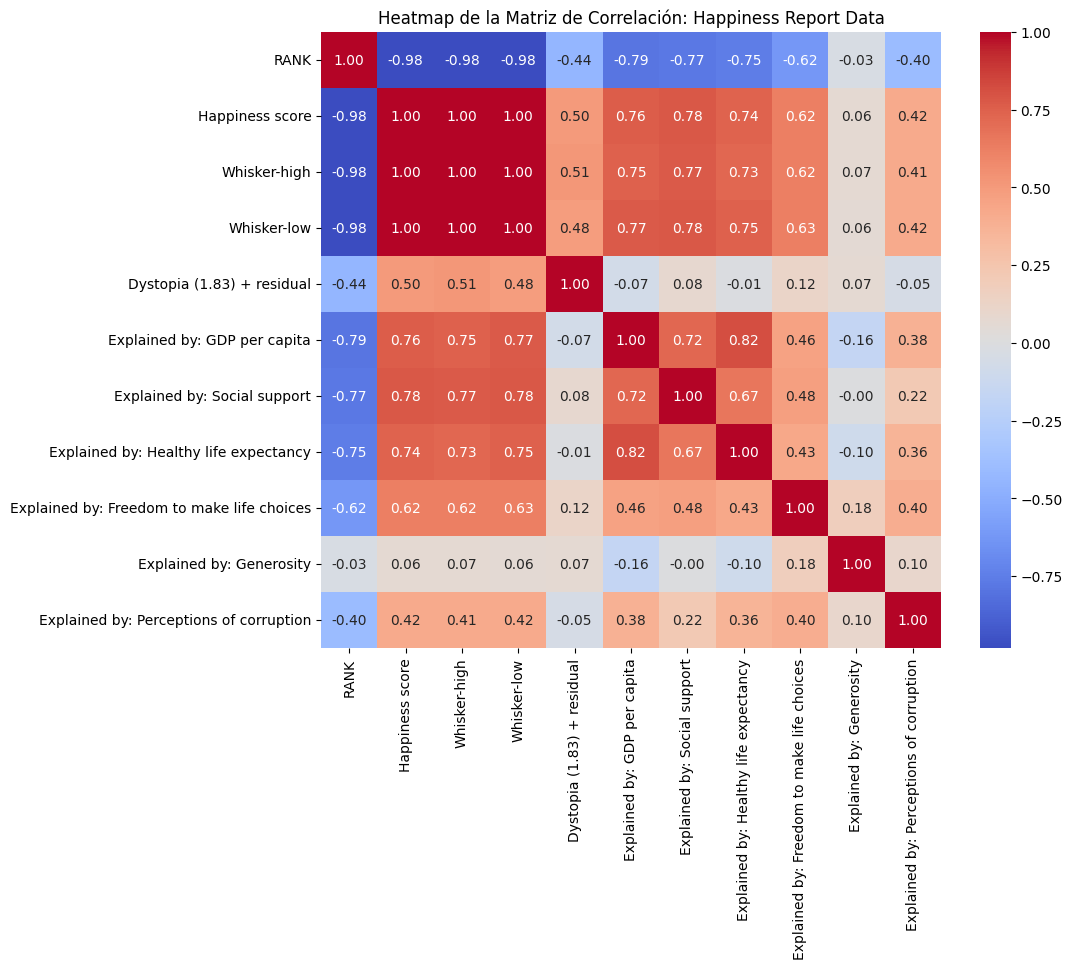

In [6]:

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlacion_matriz, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap de la Matriz de Correlación: Happiness Report Data')
plt.show()

### Histogramas

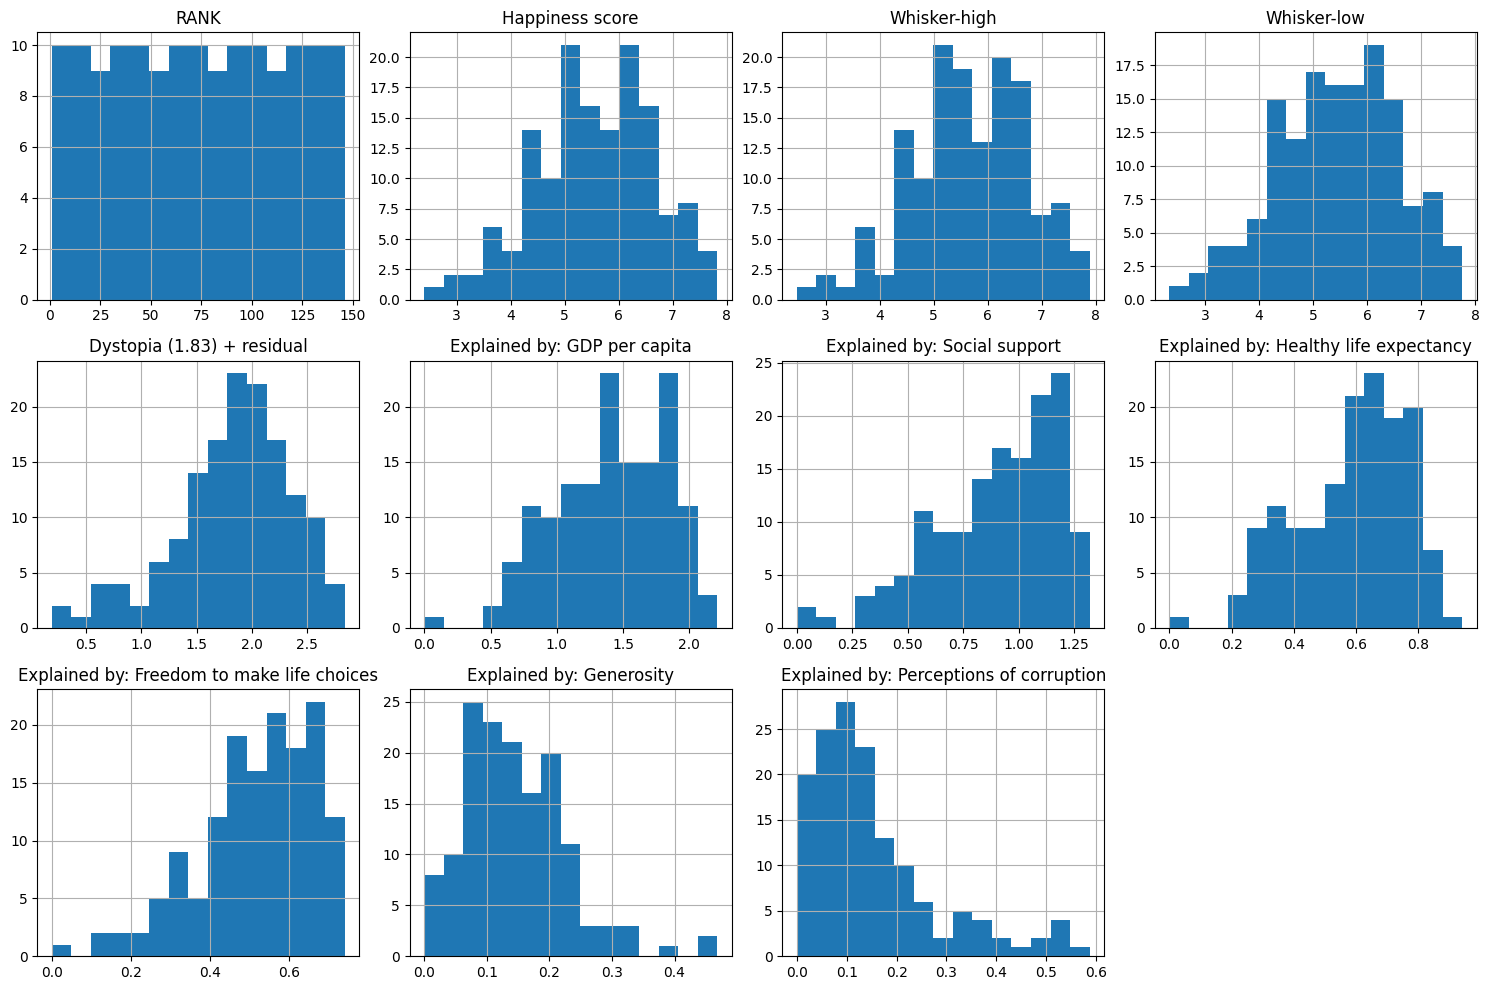

In [7]:
happiness_data.hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.tight_layout()
plt.show()


### GDP per capita vs Happiness score

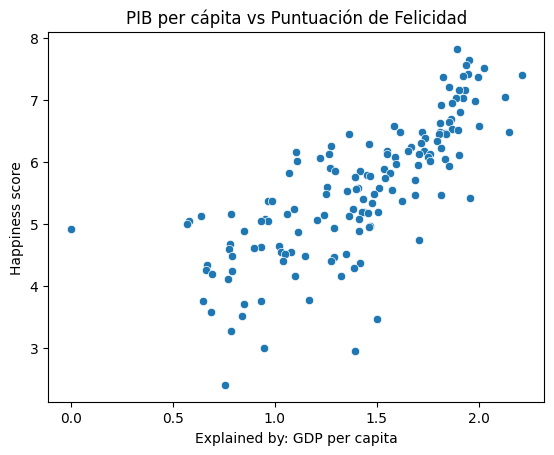

In [8]:
sns.scatterplot(data=happiness_data, x='Explained by: GDP per capita', y='Happiness score')
plt.title('PIB per cápita vs Puntuación de Felicidad')
plt.show()

## 2.) Proceso de Clustering con K-means

ELBOW METHOD


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.

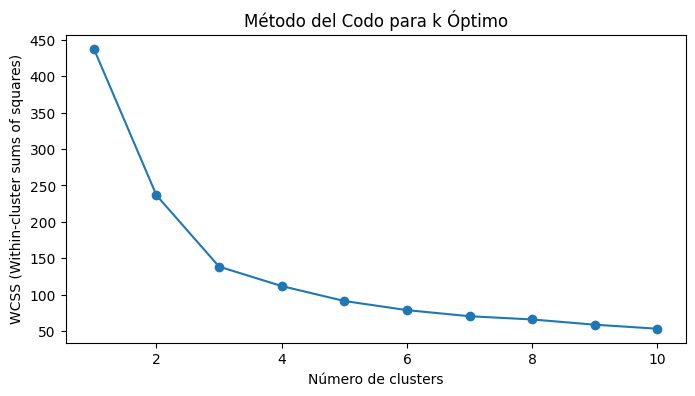

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Selección de características basada en la correlación y la relevancia teórica
caracteristicas_seleccionadas = happiness_data[['Explained by: GDP per capita', 
                                                'Explained by: Healthy life expectancy', 
                                                'Explained by: Perceptions of corruption']]

# Normalización de las características seleccionadas
escalador = StandardScaler()
X = escalador.fit_transform(caracteristicas_seleccionadas)

# Método del codo para encontrar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo para k Óptimo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS (Within-cluster sums of squares)')
plt.show()

In [23]:
# Creación del modelo KMeans con el número óptimo de clusters
n_clusters_optimo = 3  # Asumiendo que el gráfico del codo indica 3 como número óptimo
kmeans = KMeans(n_clusters=n_clusters_optimo, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



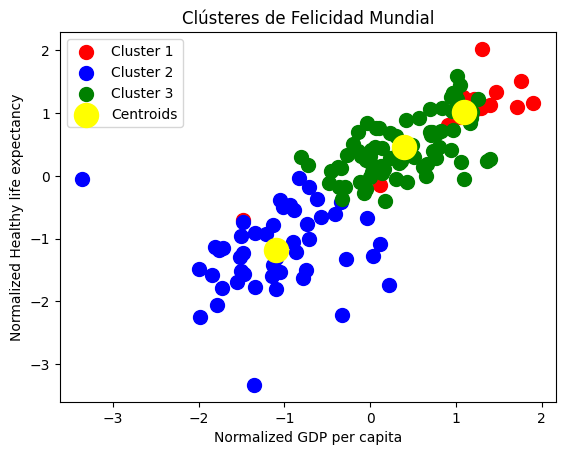

In [24]:
# Visualización de los clusters formados
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

# Centros de los clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clústeres de Felicidad Mundial')
plt.xlabel('Normalized GDP per capita')
plt.ylabel('Normalized Healthy life expectancy')
plt.legend()
plt.show()

# Añadir las etiquetas de los grupos al conjunto de datos original para análisis posteriores
happiness_data['Cluster'] = y_kmeans

## 3.) Visualización en Mapa con Plotly

In [25]:
import plotly.express as px

from sklearn.preprocessing import StandardScaler

escalar = StandardScaler()
caracteristicas_escaladas = escalar.fit_transform(caracteristicas_seleccionadas)

# Aplicar KMeans para identificar los clusters
# El número óptimo de clusters debería determinarse con el método del codo o similares
kmeans = KMeans(n_clusters=3, random_state=42)
happiness_data['Cluster'] = kmeans.fit_predict(caracteristicas_escaladas)

# Visualizar los clusters en un mapa con Plotly
fig = px.choropleth(happiness_data, locations='Country', color='Cluster',
                    locationmode='country names', hover_name='Country',
                    title='Clusters del Informe de Felicidad Mundial')
fig.show()

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

